In [ ]:
#%matplotlib notebook
import matplotlib.pyplot as plt

#hyperparams
import numpy as np
import random
import matplotlib.pyplot as plt
params = {'text.usetex' : False,
          'font.size' : 16,
          }
plt.rcParams.update(params)
import matplotlib.dates as mdates


import torch
import torch.nn as nn

from pandas_datareader import data as pdr
import pandas as pd
from empyrical import max_drawdown, cum_returns, annual_return, annual_volatility, simple_returns, sharpe_ratio, sortino_ratio, cum_returns_final

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing functions and algorithms 

from Code.utils import TimeseriesDataset, loader, Predict_Y, make_deterministic, indices, Preprocessing
from Code.Networks import  RNN, LSTM, Transformer
from Code.ML_algorithms import MAR, OLMAR, EG, Anticor
from Code.Training import Train_network

In [ ]:
# Make code fully determenistic

make_deterministic()

In [ ]:
# Choose what datasets we are testing

# Dow Jones dataset
from Code.hyperparam_Dow import *

# Nasdaq 100 dataset
#from Code.hyperparam_Nasdaq import *

# S&P 500 dataset 
#from Code.hyperparam_SP500 import *

# MOEX dataset
#from Code.hyperparam_MOEX import *

In [ ]:
# Collect and preprocess data

data = pdr.get_data_yahoo(TICKER, start = start, end = end, interval = interval).reset_index()
data = Preprocessing(data, TICKER)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
# Scale data


n_timesteps, n_assets  = data['Adj Close'].shape
 
indices_train, indices_val, indices_test = indices(n_timesteps, train_part, val_part)

scaler_X = StandardScaler()
X = data.drop(columns = 'Date').values
scaler_X.fit(X[indices_train[0]:indices_train[-1]])
X = scaler_X.transform(X)

scaler_y = StandardScaler()
y = data['Adj Close'].values
scaler_y.fit(y[indices_train[0]:indices_train[-1]])
y = scaler_y.transform(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
# Spit on train, val and test

train_loader = loader(X, y, indices_train, window, batch_size_train, shuffle = False)
val_loader = loader(X, y, indices_val, window,batch_size_val)
test_loader = loader(X, y, indices_test, window,batch_size_test)

In [ ]:
# Choose device

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# Transformer learning

output_sequence_length = n_assets
input_size = X.shape[1]


transform = Transformer(dim_val, dim_attn, input_size, dec_seq_len,  
                    output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads).to(device)
criterion =  nn.MSELoss()
opt = torch.optim.Adam(transform.parameters(), lr=lr_transformer,weight_decay=1e-3)

Train_network(transform, device, criterion, opt, num_epochs_transformer, lr_transformer, train_loader, val_loader) 
transform.eval();                   

100%|██████████| 4/4 [00:00<00:00, 20.69it/s]


Updating learning rate to 0.0010526315789473684


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.001


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.00095


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.0009025


 50%|█████     | 2/4 [00:00<00:00, 18.07it/s]

Updating learning rate to 0.000857375


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0008145062499999999


 75%|███████▌  | 3/4 [00:00<00:00, 21.06it/s]

Updating learning rate to 0.0007737809374999998


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.0007350918906249999


 75%|███████▌  | 3/4 [00:00<00:00, 19.98it/s]

Updating learning rate to 0.0006983372960937497


100%|██████████| 4/4 [00:00<00:00, 20.20it/s]

Updating learning rate to 0.0006634204312890623



100%|██████████| 4/4 [00:00<00:00, 20.92it/s]


Updating learning rate to 0.0006302494097246091


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.0005987369392383787


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.0005688000922764596


 50%|█████     | 2/4 [00:00<00:00, 19.30it/s]

Updating learning rate to 0.0005403600876626366


 50%|█████     | 2/4 [00:00<00:00, 19.32it/s]

Updating learning rate to 0.0005133420832795048


100%|██████████| 4/4 [00:00<00:00, 20.50it/s]


Updating learning rate to 0.00048767497911552955


 75%|███████▌  | 3/4 [00:00<00:00, 20.36it/s]

Updating learning rate to 0.000463291230159753


 50%|█████     | 2/4 [00:00<00:00, 19.79it/s]

Updating learning rate to 0.00044012666865176535


 50%|█████     | 2/4 [00:00<00:00, 18.72it/s]

Updating learning rate to 0.0004181203352191771


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.0003972143184582182


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.00037735360253530727


 50%|█████     | 2/4 [00:00<00:00, 19.11it/s]

Updating learning rate to 0.0003584859224085419


100%|██████████| 4/4 [00:00<00:00, 20.90it/s]


Updating learning rate to 0.0003405616262881148


100%|██████████| 4/4 [00:00<00:00, 20.98it/s]


Updating learning rate to 0.000323533544973709


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.00030735686772502356


 50%|█████     | 2/4 [00:00<00:00, 16.73it/s]

Updating learning rate to 0.0002919890243387724


 50%|█████     | 2/4 [00:00<00:00, 18.66it/s]

Updating learning rate to 0.00027738957312183375


100%|██████████| 4/4 [00:00<00:00, 20.33it/s]

Updating learning rate to 0.00026352009446574203



 75%|███████▌  | 3/4 [00:00<00:00, 19.88it/s]

Updating learning rate to 0.00025034408974245495


100%|██████████| 4/4 [00:00<00:00, 20.25it/s]

Updating learning rate to 0.00023782688525533216



100%|██████████| 4/4 [00:00<00:00, 20.45it/s]

Updating learning rate to 0.00022593554099256555



  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.00021463876394293727


  0%|          | 0/2 [00:00<?, ?it/s]

Updating learning rate to 0.00020390682574579038


 75%|███████▌  | 3/4 [00:00<00:00, 20.39it/s]

Updating learning rate to 0.00019371148445850088


100%|██████████| 2/2 [00:00<00:00, 54.88it/s]

Updating learning rate to 0.00018402591023557584


In [ ]:
# LSTM learning

n_features = data.shape[1] - 1
seq_length = window
output_length = n_assets

lstm = LSTM(n_features, seq_length, n_hidden_lstm, n_layers_lstm, output_length).to(device)
criterion =  nn.MSELoss()
opt = torch.optim.Adam(lstm.parameters(), lr=lr_lstm,weight_decay=1e-3)

Train_network(lstm, device, criterion, opt, num_epochs_lstm, lr_lstm, train_loader, val_loader)
lstm.eval();

  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0010526315789473684
Updating learning rate to 0.001


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00095


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0009025
Updating learning rate to 0.000857375


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0008145062499999999


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0007737809374999998
Updating learning rate to 0.0007350918906249999


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0006983372960937497


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0006634204312890623
Updating learning rate to 0.0006302494097246091


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0005987369392383787


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0005688000922764596
Updating learning rate to 0.0005403600876626366


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0005133420832795048


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00048767497911552955
Updating learning rate to 0.000463291230159753


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00044012666865176535


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0004181203352191771
Updating learning rate to 0.0003972143184582182


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00037735360253530727


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0003584859224085419
Updating learning rate to 0.0003405616262881148


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.000323533544973709


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00030735686772502356


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0002919890243387724
Updating learning rate to 0.00027738957312183375


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00026352009446574203


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00025034408974245495
Updating learning rate to 0.00023782688525533216


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00022593554099256555


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00021463876394293727
Updating learning rate to 0.00020390682574579038


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00019371148445850088


100%|██████████| 2/2 [00:00<00:00, 133.93it/s]

Updating learning rate to 0.00018402591023557584


In [ ]:
# RNN learning

n_features = data.shape[1] - 1
seq_length = window
output_length = n_assets

rnn = RNN(n_features, seq_length, n_hidden_rnn, n_layers_rnn, output_length).to(device)
criterion =  nn.MSELoss()
opt = torch.optim.Adam(rnn.parameters(), lr=lr_rnn,weight_decay=1e-3)

Train_network(rnn, device, criterion, opt, num_epochs_rnn, lr_rnn, train_loader, val_loader)
rnn.eval();

100%|██████████| 2/2 [00:00<00:00, 145.43it/s]


Updating learning rate to 0.0010526315789473684


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.001
Updating learning rate to 0.00095


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0009025


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.000857375
Updating learning rate to 0.0008145062499999999


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0007737809374999998


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0007350918906249999
Updating learning rate to 0.0006983372960937497


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0006634204312890623


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0006302494097246091
Updating learning rate to 0.0005987369392383787


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0005688000922764596


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0005403600876626366
Updating learning rate to 0.0005133420832795048


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00048767497911552955


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.000463291230159753
Updating learning rate to 0.00044012666865176535


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0004181203352191771


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0003972143184582182


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00037735360253530727


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.0003584859224085419
Updating learning rate to 0.0003405616262881148


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.000323533544973709


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00030735686772502356
Updating learning rate to 0.0002919890243387724


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00027738957312183375


  0%|          | 0/4 [00:00<?, ?it/s]

Updating learning rate to 0.00026352009446574203
Updating learning rate to 0.00025034408974245495


100%|██████████| 2/2 [00:00<00:00, 147.77it/s]

Updating learning rate to 0.00023782688525533216


In [ ]:
# Obtaining real test data and predicting values from OLMAR, Transformer, LSTM and RNN 


y_test_true, y_test_Transformer = Predict_Y(test_loader, transform, scaler_y, device)
_, y_test_LSTM = Predict_Y(test_loader, lstm, scaler_y, device)
_, y_test_RNN = Predict_Y(test_loader, rnn, scaler_y, device)

y_MAR = MAR(data['Adj Close'].values , window) - 1
y_test_MAR = y_MAR[-len(y_test_true):]

In [ ]:
# Obtaining weigths

weight_o = np.ones((n_assets)) / n_assets
epsilon = 0.01

weigth_test_OLMAR = OLMAR(epsilon, y_test_MAR, weight_o)
weigth_test_Transformer = OLMAR(epsilon, y_test_Transformer, weight_o)
weigth_test_LSTM = OLMAR(epsilon, y_test_LSTM, weight_o)
weigth_test_RNN = OLMAR(epsilon, y_test_RNN, weight_o)

In [ ]:
# Daily returns for OLMAR, Transformer, LSTM, RNN and BAH

daily_returns_OLMAR = (weigth_test_OLMAR * y_test_true).sum(axis = 1)
daily_returns_Transformer = (weigth_test_Transformer * y_test_true).sum(axis = 1)
daily_returns_LSTM = (weigth_test_LSTM * y_test_true).sum(axis = 1)
daily_returns_RNN = (weigth_test_RNN * y_test_true).sum(axis = 1)
daily_returns_BAH = y_test_true.mean(axis = 1)

In [ ]:
# Daily returns Anticor 

opts = []

daily_returns_Anticor = Anticor(data['Adj Close'].values, 0, opts, window=30)
daily_returns_Anticor = daily_returns_Anticor[-len(y_test_true):]

100%|██████████| 2824/2824 [00:38<00:00, 73.62it/s]


In [ ]:
# Daily returns EG 


opts = []

daily_returns_EG = EG(data['Adj Close'].values[-len(y_test_true):], 0, opts, eta=0.05)

100%|██████████| 415/415 [00:00<00:00, 19793.00it/s]


In [ ]:
def Result_Table(Daily_Returns, metrics):

  table = np.zeros(shape = (len(metrics), len(Daily_Returns)))

  for i, model in enumerate(Daily_Returns):

    for j, metric in enumerate(metrics):

      table[j, i] = round(metric(model), 3)

  table = pd.DataFrame(table, index= ['Cumulative Return', 'Annual Return', 'Sharpe Ratio', 'Sortino Ratio', 'Annual Volatility', 'Max Drowdown'],
                       columns= ['BAH', 'EG', 'Anticor', 'OLMAR', 'Transformer', 'LSTM', 'RNN'])
  table=table.transpose()
  table = table.style.format({'Annual Volatility': "{:.2%}", 'Max Drowdown': "{:.2%}", 'Cumulative Return': "{:.2%}",
                     'Annual Return': "{:.2%}", 'Sharpe Ratio': "{:.2}", 'Sortino Ratio': "{:.2}"})                      
  return table


In [ ]:
Daily_Returns = [daily_returns_BAH, daily_returns_EG, daily_returns_Anticor, daily_returns_OLMAR,
                 daily_returns_Transformer,  daily_returns_LSTM, daily_returns_RNN]                 
metrics = [cum_returns_final, annual_return, sharpe_ratio, sortino_ratio, annual_volatility, max_drawdown]

table = Result_Table(Daily_Returns, metrics)

In [ ]:
# Result table for dataset 

table.background_gradient()

,Cumulative Return,Annual Return,Sharpe Ratio,Sortino Ratio,Annual Volatility,Max Drowdown
BAH,31.70%,18.20%,0.72,1.0,29.10%,-35.00%
EG,31.50%,18.10%,0.72,1.0,29.00%,-34.90%
Anticor,8.80%,5.30%,0.34,0.48,42.90%,-56.20%
OLMAR,23.20%,13.50%,0.59,0.87,27.80%,-35.60%
Transformer,48.50%,27.10%,0.88,1.3,33.80%,-39.20%
LSTM,48.50%,27.10%,0.89,1.3,33.30%,-32.60%
RNN,16.80%,9.90%,0.49,0.68,26.40%,-29.10%


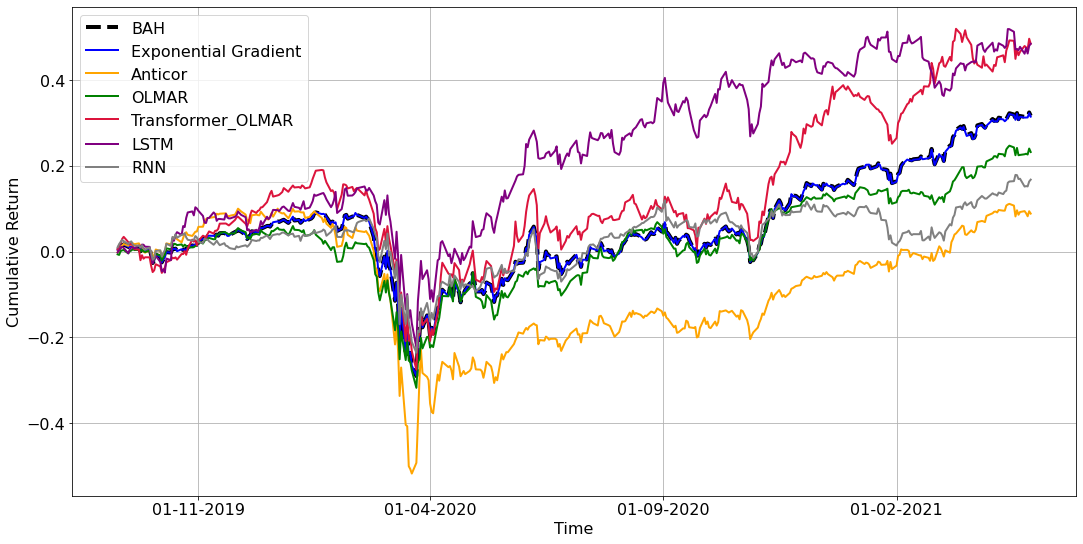

In [ ]:
# Result graph for dataset 

plt.figure(figsize=(18,9),facecolor='white')
fig = plt.gcf()
ax = plt.gca()
# set formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
test_dates = data['Date'][-len(y_test_true):]

plt.plot(test_dates,cum_returns(daily_returns_BAH), label = 'BAH',linestyle='--',color='black', lw= 4)
plt.plot(test_dates,cum_returns(daily_returns_EG), label = 'Exponential Gradient',color='blue',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_Anticor), label = 'Anticor',color='orange',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_OLMAR), label = 'OLMAR',color='green',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_Transformer), label = 'Transformer_OLMAR',color='crimson',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_LSTM), label = 'LSTM',color='purple',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_RNN), label = 'RNN',color='gray',lw=2)

plt.xlabel('Time')
plt.ylabel('Cumulative Return')

plt.legend()
plt.grid()
plt.show()